In [1]:
import os
from pathlib import Path

import json

In [2]:
root = str(Path(os.getcwd()).absolute().parent)
os.chdir(root)

In [3]:
root

'/Users/maximebonnin/Documents/Projects/SCOR/Datathon'

In [4]:
import pandas as pd
import numpy as np

from tqdm.notebook import tqdm, trange

from merge import add_key_str

from clean import main_clean

In [5]:
pathData = Path('Data/RawData')
pathSubmission = Path('Data/03_Prediction')

In [9]:
season = "Kharif"
Kharif = pd.read_csv(pathSubmission / f"GP_Pred_{season}.csv")

season = "Rabi"
Rabi = pd.read_csv(pathSubmission / f"GP_Pred_{season}.csv")

In [10]:
Kharif

,key,State,District,Sub-District,Block,GP,Cluster
0,andhra pradesh_anantapur_agali__agali,andhra pradesh,anantapur,agali,NaN,agali,NaN
1,andhra pradesh_anantapur_agali__akkagaladevara...,andhra pradesh,anantapur,agali,NaN,akkagaladevarahalli,NaN
2,andhra pradesh_anantapur_agali__hulikeradevara...,andhra pradesh,anantapur,agali,NaN,hulikeradevarahalli,NaN
3,andhra pradesh_anantapur_agali__inagalore,andhra pradesh,anantapur,agali,NaN,inagalore,NaN
4,andhra pradesh_anantapur_agali__kodihalli,andhra pradesh,anantapur,agali,NaN,kodihalli,NaN
...,...,...,...,...,...,...,...
285036,uttar pradesh_sitapur_behta_rohiya shivpur_ram...,uttar pradesh,sitapur,behta,rohiya shivpur,ramuwapur,NaN
285037,uttar pradesh_hamirpur_sarila_jalalpur_kupara,uttar pradesh,hamirpur,sarila,jalalpur,kupara,NaN
285038,uttar pradesh_hamirpur_maudaha_bhulsi_bhulsi,uttar pradesh,hamirpur,maudaha,bhulsi,bhulsi,NaN
285039,uttar pradesh_hamirpur_sarila_jalalpur_bhendid...,uttar pradesh,hamirpur,sarila,jalalpur,bhendidanda,NaN


In [11]:
Rabi

,key,State,District,Sub-District,Block,GP,Cluster
0,andhra pradesh_anantapur_vidapanakal__,andhra pradesh,anantapur,vidapanakal,NaN,NaN,NaN
1,andhra pradesh_anantapur_vajrakarur__,andhra pradesh,anantapur,vajrakarur,NaN,NaN,NaN
2,andhra pradesh_anantapur_gooty__,andhra pradesh,anantapur,gooty,NaN,NaN,NaN
3,andhra pradesh_anantapur_guntakal__,andhra pradesh,anantapur,guntakal,NaN,NaN,NaN
4,andhra pradesh_anantapur_pamidi__,andhra pradesh,anantapur,pamidi,NaN,NaN,NaN
...,...,...,...,...,...,...,...
226138,uttar pradesh_agra_jaitpur kalan_kookapur_muku...,uttar pradesh,agra,jaitpur kalan,kookapur,mukutpura,NaN
226139,uttar pradesh_agra_khandauli_dhaurra_rahan khurd,uttar pradesh,agra,khandauli,dhaurra,rahan khurd,NaN
226140,uttar pradesh_agra_kheragarh_sitouli_khanpur,uttar pradesh,agra,kheragarh,sitouli,khanpur,NaN
226141,uttar pradesh_agra_pinahat_husainpura_ladhavapura,uttar pradesh,agra,pinahat,husainpura,ladhavapura,NaN


In [16]:
Kharif_excel = list()
Rabi_excel = list()
for season in ["Kharif", "Rabi"]:
    for path in tqdm(pathData.glob(f"*/*_{season}.xlsx")):
        df = pd.read_excel(path)
        add_key_str(df)
        if season == "Kharif":
            Kharif_excel.extend(list(df["key_str"]))

        elif season == "Rabi":
            Rabi_excel.extend(list(df["key_str"]))


0it [00:00, ?it/s]

0it [00:00, ?it/s]

In [23]:
print(len(set(Kharif_excel)))
print(len(set(Kharif_excel) & set(Kharif["key"])))

196587
132423


In [24]:
print(len(set(Rabi_excel)))
print(len(set(Rabi_excel) & set(Rabi["key"])))

134375
104588


In [22]:
print(len(set(Rabi_excel) & set(Rabi["key"])))

104588


In [25]:
missedRabi = set(Rabi_excel) - set(Rabi["key"])
missedKharif = set(Kharif_excel) - set(Kharif["key"])

In [28]:
missedRabi

{'rajasthan_bhilwara_raipur_ukfkfm+;kl_ukfkfm+;kl',
 'karnataka_mysore_periyapatna_piriyapatna_kiranalli',
 'telangana_nalgonda_nan_nalgonda_ammaguda',
 'odisha_puri_nan_sadar (puri sadar)_gaudakera',
 'rajasthan_bhilwara_phooliya kalan_kuksi_kuksi',
 'telangana_rangareddy_nan_maheshwaram_toopra khurd',
 'rajasthan_alwar_alwar_cgknjiqj_ddjkyh',
 'andhra pradesh_guntur_128_kollur_ravikampadu',
 'telangana_mahbubnagar_nan_midjil_ippaipahad',
 'andhra pradesh_prakasam_102_marripudi_juvvi gunta',
 'rajasthan_jalore_ahore_xksnu_xksnu',
 'karnataka_mysore_h.d.kote_antharasanthe_beechanahalli',
 'telangana_jangaon_nan_devaruppala_madhapur',
 'telangana_mahabubabad_nan_gudur_adivarmpet',
 'rajasthan_pratapgarh_chhoti sadri_ukjk.kh_dslwunk',
 'telangana_jayashankar_nan_tekumatla_ramakistapur_v',
 'rajasthan_bharatpur_pahari_lglu_lglu&kk',
 'rajasthan_bhilwara_mandalgarh_flaxksyh_eksvjksdk[kasm+k',
 'rajasthan_bikaner_bikaner_chdkusj_chdkusj',
 'rajasthan_chittorgarh_rawatbhata_cksjko_xksikyiqjk

In [29]:
missedKharif

{'odisha_koraput_nan_nondapur_chatwa(chatua)',
 'odisha_angul_nan_anugul_nandapur',
 'odisha_sambalpur_nan_rairakhol_bausajal',
 'rajasthan_bhilwara_raipur_ukfkfm+;kl_ukfkfm+;kl',
 'chhattisgarh_surajpur_surajpur_surajpur_',
 'gujarat_surat_nan_bardoli_ninat',
 'telangana_nalgonda_nan_munugode_kalavala palle',
 'bihar_siwan_nan_bhagwanpurhaat_bramhasthaan',
 'telangana_nalgonda_nan_nalgonda_ammaguda',
 'west bengal_paschim bardhaman_nan_ketugram-ii_gangatikuri',
 'odisha_puri_nan_sadar (puri sadar)_gaudakera',
 'bihar_siwan_nan_siwan sadar_saraaven',
 'telangana_wanaparthy_nan_wanaparthy_chimanguntapall',
 'telangana_nalgonda_nan_vemulapalle_annapureddiguda',
 'rajasthan_udaipur_badgaon_lkisfv;k_vecsjh',
 'telangana_jayashankar_nan_mulug_singannaguda',
 'rajasthan_alwar_alwar_cgknjiqj_ddjkyh',
 'odisha_mayurbhanj_nan_kaptipada_nato',
 'andhra pradesh_vishakhapatnam_rambilli__velchuru',
 'telangana_mahbubnagar_nan_midjil_ippaipahad',
 'odisha_jajpur_nan_dharmasala_mirzapur',
 'andhra pr

In [30]:
missedRabi = set(Rabi["key"]) - set(Rabi_excel)
missedKharif = set(Kharif["key"]) - set(Kharif_excel)

In [31]:
print(len(missedRabi))
print(len(missedKharif))

121555
152618


In [32]:
missedRabi

{'uttar pradesh_jalaun_maheva_churkhi_kukahnu',
 'uttar pradesh_pilibhit_puranpur_sabalpur khas_mujaffar nagar',
 'uttar pradesh_bareilly_mirganj_gularia_singra',
 'madhya pradesh_rajgarh_pachour_talen_iklera',
 'madhya pradesh_sehore_ichchhawar_molga_amlaha',
 'madhya pradesh_ratlam_piploda_kalukheda_bachhodiya',
 'uttar pradesh_allahabad_dhanupur_damagarha_sarai alam madari',
 'uttar pradesh_ballia_veruarwari_narainpur_majhos khurd',
 'uttar pradesh_budaun_islamnagar_sadatpur nachani_naderi',
 'andhra pradesh_srikakulam_kaviti__-',
 'uttar pradesh_varanasi_cholapur_rauna kala_rauna kala',
 'uttar pradesh_pilibhit_lalaurikhera_aimi_guriya gafarpur',
 'tamil nadu_kancheepuram & chengalpattu_sriperumbudur_vallam_valathanjeri',
 'uttar pradesh_pratapgarh_vihar_rasoolpur nindura_biharia',
 'uttar pradesh_saharanpur_rampur maniharan_pahansu_sakatpur must',
 'uttar pradesh_fatehpur_airaya_mohammadpur gaunti_arampur basai',
 'uttar pradesh_etah_sakit_sonhar_garhiyasheelam',
 'uttar pradesh_l

In [33]:
missedKharif

{'uttar pradesh_jalaun_maheva_churkhi_kukahnu',
 'madhya pradesh_shivpuri__shivpuri_jhingura',
 'madhya pradesh_morena_porsa_rajodha_dondri',
 'uttar pradesh_pilibhit_puranpur_sabalpur khas_mujaffar nagar',
 'uttar pradesh_bareilly_mirganj_gularia_singra',
 'madhya pradesh_rajgarh_pachour_talen_iklera',
 'andhra pradesh_visakhapatnam_ravikamatham__gummallapadu',
 'madhya pradesh_ratlam_piploda_kalukheda_bachhodiya',
 'uttar pradesh_allahabad_dhanupur_damagarha_sarai alam madari',
 'uttar pradesh_ballia_veruarwari_narainpur_majhos khurd',
 'uttar pradesh_budaun_islamnagar_sadatpur nachani_naderi',
 'tamil nadu_villupuram & kallakurichi_chinnasalem_kallakurichi_vadakanandhal',
 'uttar pradesh_varanasi_cholapur_rauna kala_rauna kala',
 'odisha_puri__krushnaprasad_berhampur',
 'uttar pradesh_pilibhit_lalaurikhera_aimi_guriya gafarpur',
 'madhya pradesh_damoh_hatta__',
 'chhattisgarh_korba_korba_bhaisma_chitapali',
 'uttar pradesh_pratapgarh_vihar_rasoolpur nindura_biharia',
 'madhya prades

In [34]:
Kharif.query("key == 'uttar pradesh_sant ravi das nagar_aurai_ramapur_kharhgpur'")

,key,State,District,Sub-District,Block,GP,Cluster
271429,uttar pradesh_sant ravi das nagar_aurai_ramapu...,uttar pradesh,sant ravi das nagar,aurai,ramapur,kharhgpur,NaN


In [6]:
for path in tqdm(pathData.glob(f"*/*.xlsx"), total=len(list(pathData.glob(f"*/*.xlsx")))):
        df = pd.read_excel(path)
        name = str(path).split("/")[-1].replace(".xlsx", "") + ".json"
        _, stats = main_clean(df, return_stats=True)

        with open(pathData / f"stats/{name}", "w") as f:
            json.dump(stats, f)
        


  0%|          | 0/80 [00:00<?, ?it/s]

In [8]:
stats = {"Kharif": {}, "Rabi": {}}
for path in tqdm(pathData.glob(f"*/*.json"), total=len(list(pathData.glob(f"*/*.json")))):

        with open(path, "r") as f:

            stats_state = json.load(f)
        year = str(path).split("/")[-1].replace(".json", "").split("_")[0]
        name = str(path).split("/")[-1].replace(".json", "").split("_")[1]
        season = str(path).split("/")[-1].replace(".json", "").split("_")[-1]
        stats[season][f"{year}_{name}"] = stats_state


stats

  0%|          | 0/80 [00:00<?, ?it/s]

{'Kharif': {'2019_Odisha': {'paddy': {'Area Sown (Ha)': nan,
    'Area Insured (Ha)': 249.34030281182407,
    'SI Per Ha (Inr/Ha)': 57752.67901946647,
    'Sum Insured (Inr)': 14629326.700793078,
    'Indemnity Level': 0.7,
    '2000 Yield': 1524.9648521989907,
    '2001 Yield': 2367.433550108147,
    '2002 Yield': 1084.5729516943043,
    '2003 Yield': 2173.691372746936,
    '2004 Yield': 2177.241395818313,
    '2005 Yield': 2268.2915645277576,
    '2006 Yield': 2232.686085075703,
    '2007 Yield': 2449.2683489545784,
    '2008 Yield': 2164.5352559480893,
    '2009 Yield': 2318.893871665465,
    '2010 Yield': 2301.76279740447,
    '2011 Yield': 1884.2149963950974,
    '2012 Yield': 3212.4648882480174,
    '2013 Yield': 2319.9671232876713,
    '2014 Yield': 3261.3170872386445,
    '2015 Yield': 2058.4103821196827,
    '2016 Yield': 3427.752820475847,
    '2017 Yield': 2463.0015212689254,
    '2018 Yield': nan},
   'cotton': {'Area Sown (Ha)': nan,
    'Area Insured (Ha)': 1011.363636363

In [12]:
columns=["Season", "Crop","Year",'Area Sown (Ha)', "Area Insured (Ha)", 'SI Per Ha (Inr/Ha)', 'Sum Insured (Inr)', 'Indemnity Level']

for year in range(2000,2019):
    columns.append(f"{year} Yield")

df = pd.DataFrame(columns=columns)
df

,Season,Crop,Year,Area Sown (Ha),Area Insured (Ha),SI Per Ha (Inr/Ha),Sum Insured (Inr),Indemnity Level,2000 Yield,2001 Yield,...,2009 Yield,2010 Yield,2011 Yield,2012 Yield,2013 Yield,2014 Yield,2015 Yield,2016 Yield,2017 Yield,2018 Yield


In [20]:
L = []
for season in stats:
    for state in stats[season]:
        name = state.split("_")[1]
        year = state.split("_")[0]
        for crop in stats[season][state]:
            vector = np.empty(len(columns), dtype=object)
            vector[0] = season
            vector[1] = crop
            vector[2] = year
            for i in range(3, len(columns)):
                vector[i] = stats[season][state][crop][columns[i]]

            L.append(vector)
            # df = df.append(pd.DataFrame(vector))


In [22]:
df = pd.DataFrame(L, columns=columns)
df

,Season,Crop,Year,Area Sown (Ha),Area Insured (Ha),SI Per Ha (Inr/Ha),Sum Insured (Inr),Indemnity Level,2000 Yield,2001 Yield,...,2009 Yield,2010 Yield,2011 Yield,2012 Yield,2013 Yield,2014 Yield,2015 Yield,2016 Yield,2017 Yield,2018 Yield
0,Kharif,paddy,2019,NaN,249.340303,57752.679019,1.462933e+07,0.7,1524.964852,2367.43355,...,2318.893872,2301.762797,1884.214996,3212.464888,2319.967123,3261.317087,2058.410382,3427.752820,2463.001521,NaN
1,Kharif,cotton,2019,NaN,1011.363636,66933.522727,6.796307e+07,0.7,NaN,NaN,...,1267.090909,1398.409091,961.090909,422.681818,426.363636,399.590909,349.227273,459.704545,460.772727,NaN
2,Kharif,ginger,2019,NaN,134.000000,215805.000000,3.027275e+07,0.7,NaN,NaN,...,8710.840000,8913.080000,5704.560000,10007.240000,9500.640000,8227.200000,6688.760000,9022.200000,8502.120000,NaN
3,Kharif,groundnut,2019,NaN,231.578947,45848.736842,1.052519e+07,0.7,NaN,NaN,...,973.907895,1059.934211,938.236842,1091.684211,1181.223684,1210.789474,1001.394737,1585.368421,1089.881579,NaN
4,Kharif,turmeric,2019,NaN,247.058824,186605.882353,4.823147e+07,0.7,NaN,NaN,...,8341.235294,11973.647059,6012.058824,8977.235294,9314.748235,8755.588235,8558.882353,8604.000000,8877.235294,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,Rabi,wheat,2018,NaN,367.938931,51651.706107,1.886823e+07,0.8,NaN,NaN,...,NaN,NaN,1508.501908,1717.019084,1581.822519,1506.847328,1468.709924,NaN,NaN,NaN
933,Rabi,bengal gram (chana),2018,NaN,380.228137,40176.612167,1.516597e+07,0.8,NaN,NaN,...,807.634981,644.897338,856.927757,989.585551,1037.980989,892.558935,867.916350,NaN,NaN,NaN
934,Rabi,mustard,2018,NaN,479.087452,29613.615970,1.407021e+07,0.8,NaN,NaN,...,862.456274,761.494297,803.825095,889.155894,898.543726,889.737643,913.878327,NaN,NaN,NaN
935,Rabi,potato,2018,NaN,68.054753,137899.798479,9.513570e+06,0.8,NaN,NaN,...,7271.250951,6517.878327,8308.326996,7145.334601,6041.406844,6780.292776,6813.802281,NaN,NaN,NaN


In [23]:
crops_Kharif = df.query("Season == 'Kharif'")["Crop"].unique()
crops_Rabi = df.query("Season == 'Rabi'")["Crop"].unique()

In [24]:
crops_Kharif[0]

'paddy'

In [63]:
INDEX = ['Area Sown (Ha)', "Area Insured (Ha)", 'SI Per Ha (Inr/Ha)', 'Sum Insured (Inr)', 'Indemnity Level','2012 Yield', '2013 Yield', '2014 Yield', '2015 Yield']

array([[<AxesSubplot:title={'center':'Area Sown (Ha)'}, xlabel='Year'>,
        <AxesSubplot:title={'center':'Area Insured (Ha)'}, xlabel='Year'>],
       [<AxesSubplot:title={'center':'SI Per Ha (Inr/Ha)'}, xlabel='Year'>,
        <AxesSubplot:title={'center':'Sum Insured (Inr)'}, xlabel='Year'>],
       [<AxesSubplot:title={'center':'Indemnity Level'}, xlabel='Year'>,
        <AxesSubplot:>]], dtype=object)

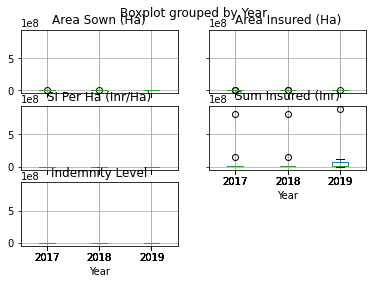

In [37]:
crop = "paddy"
df.query(f"Crop == '{crop}' & Season == 'Kharif'").boxplot(column=INDEX, by="Year")

array([[<AxesSubplot:title={'center':'Area Sown (Ha)'}>,
        <AxesSubplot:title={'center':'Area Insured (Ha)'}>],
       [<AxesSubplot:title={'center':'SI Per Ha (Inr/Ha)'}>,
        <AxesSubplot:title={'center':'Sum Insured (Inr)'}>],
       [<AxesSubplot:title={'center':'Indemnity Level'}>, <AxesSubplot:>]],
      dtype=object)

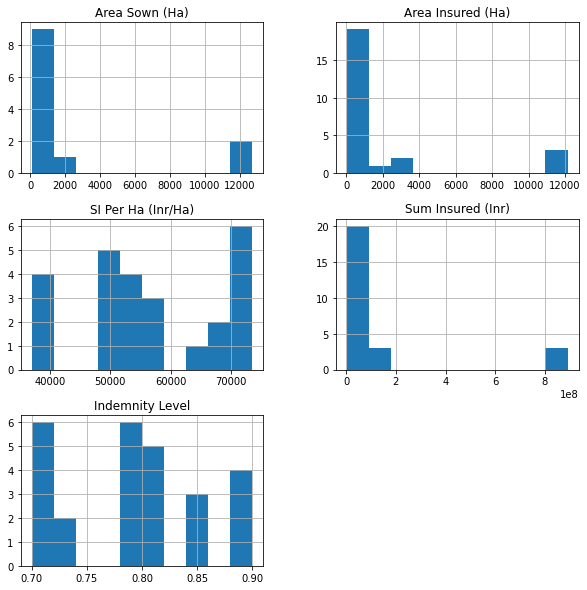

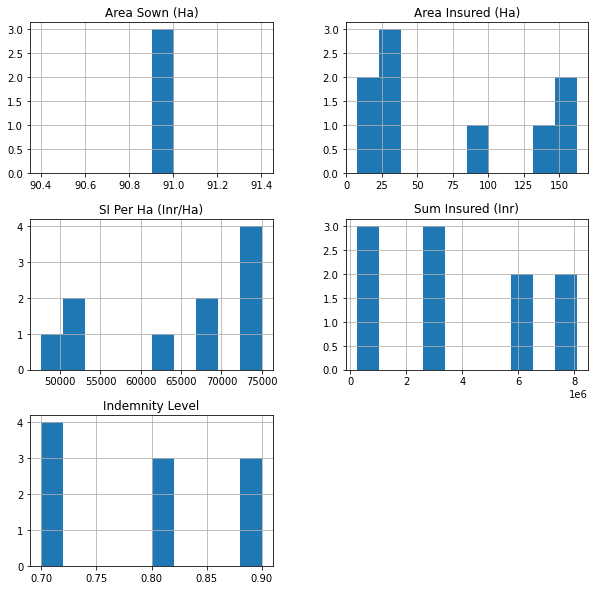

In [42]:
df.query(f"Crop == '{crop}' & Season == 'Kharif'").hist(column=INDEX, figsize=(10,10))
df.query(f"Crop == '{crop}' & Season == 'Rabi'").hist(column=INDEX, figsize=(10,10))

array([[<AxesSubplot:title={'center':'Area Sown (Ha)'}, xlabel='Crop'>,
        <AxesSubplot:title={'center':'Area Insured (Ha)'}, xlabel='Crop'>,
        <AxesSubplot:title={'center':'SI Per Ha (Inr/Ha)'}, xlabel='Crop'>],
       [<AxesSubplot:title={'center':'Sum Insured (Inr)'}, xlabel='Crop'>,
        <AxesSubplot:title={'center':'Indemnity Level'}, xlabel='Crop'>,
        <AxesSubplot:title={'center':'2012 Yield'}, xlabel='Crop'>],
       [<AxesSubplot:title={'center':'2013 Yield'}, xlabel='Crop'>,
        <AxesSubplot:title={'center':'2014 Yield'}, xlabel='Crop'>,
        <AxesSubplot:title={'center':'2015 Yield'}, xlabel='Crop'>]],
      dtype=object)

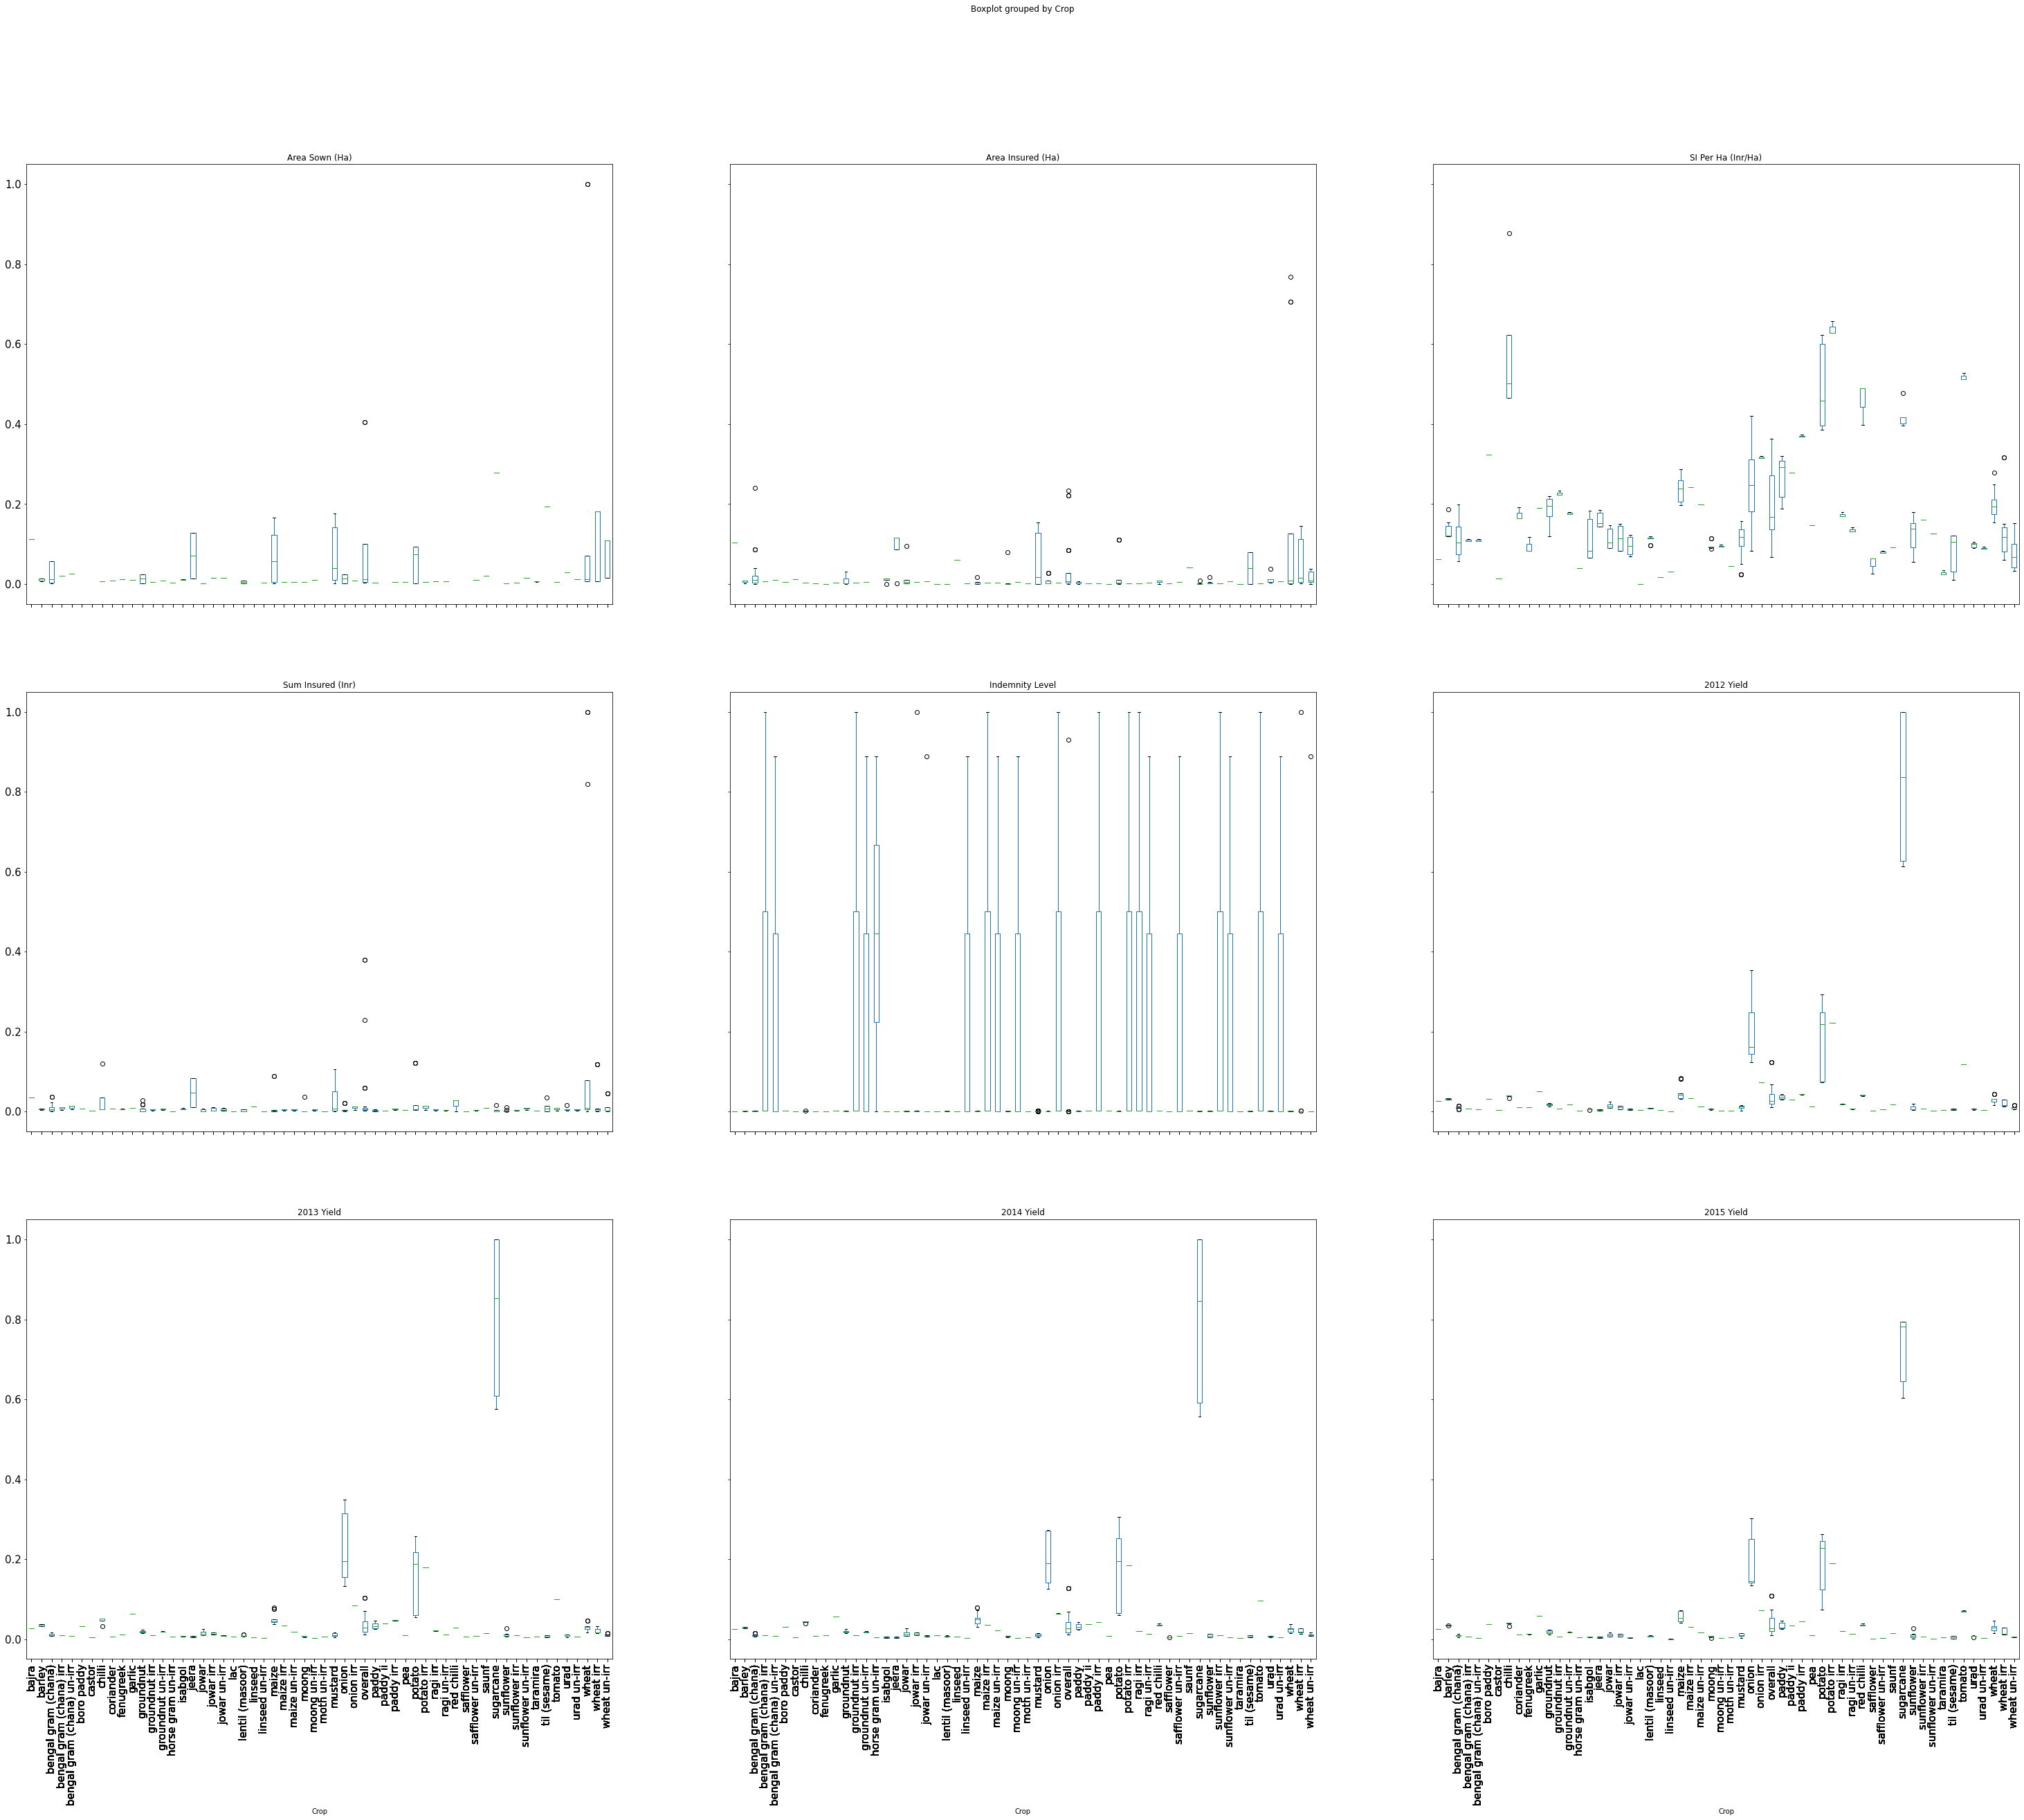

In [64]:
df[INDEX] = (df[INDEX] - df[INDEX].min()) / (df[INDEX].max() - df[INDEX].min())
# df.query(f"Season == 'Kharif'").boxplot(column=INDEX, by="Crop", figsize=(30,30), fontsize=5, rot=90)
df.query(f"Season == 'Rabi'").boxplot(column=INDEX, by="Crop", figsize=(50,40), fontsize=15, rot=90, grid=False)